# Video labeling

The purpose of this notebook is to generate a dataframe where each row is a frame of a given video with its corresponding ground truth label.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import utils

In [4]:
# create dictionary of all phases
phase_dict = {
    'adhesiolysis' : 0,
    'blurry' : 1,
    'catheter insertion' : 2,
    'mesh placement' : 3,
    'mesh positioning' : 4,
    'out of body' : 5,
    'peritoneal closure' : 6,
    'peritoneal scoring' : 7,
    'positioning suture' : 8,
    'preperioneal dissection' : 9,
    'primary hernia repair' : 10,
    'reduction of hernia' : 11,
    'stationary idle' : 12,
    'transitionary idle' : 13,
    }

In [5]:
# read csv with dummy data annotation
dummy_annotation_df = pd.read_csv(utils.csv_path)

# create dataframe with labels for every frame of all videos
labels_df = pd.DataFrame(columns = ['videoname', 'frame', 'label'])

In [6]:
videonames, frames, labels = [], [], []

for index in range(dummy_annotation_df.shape[0]):

    # obtain row values
    videoname = dummy_annotation_df['videoName'][index]
    phasename = dummy_annotation_df['PhaseName'][index]
    start = dummy_annotation_df['Start'][index]
    end = dummy_annotation_df['End'][index]

    if ':' in start and ':' in end: # verifies if it is indeed a time coded line

        # get corresponding label
        label = phase_dict[phasename]
        frame_start = int(start[-5:-3]) * 60 + int(start[-2:])
        frame_end = int(end[-5:-3]) * 60 + int(end[-2:])
        # treat cases where the video is more than one hour long
        if len(start) > 5: frame_start += int(start[0:2]) * 3600
        if len(end) > 5: frame_end += int(end[0:2]) * 3600
        for frame in range(frame_start, frame_end):
            videonames.append(videoname)
            frames.append(frame)
            labels.append(label)

# generate labels dataframe
# we put frames + 1
labels_df = pd.DataFrame({'videoname' : videonames, 'frame' : frames, 'label' : labels})

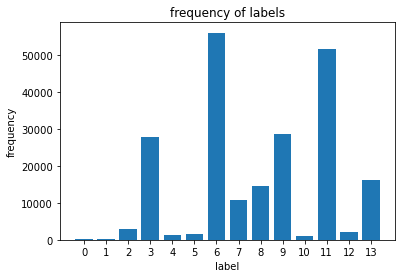

In [7]:
# plot histogram of labels
labels, counts = np.unique(labels_df['label'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("frequency of labels")
plt.xlabel("label")
plt.ylabel("frequency")
plt.show()

Text(0.5, 1.0, 'Phases')

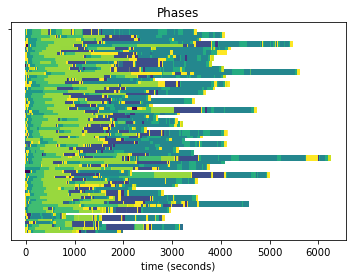

In [8]:
# plot phases
plt.scatter(x = labels_df['frame'], y = labels_df['videoname'], c = labels_df['label'], label = labels_df['label'], marker = '|')
plt.yticks('')
plt.xlabel('time (seconds)')
plt.title('Phases')

In [9]:
# save labels
labels_df.to_pickle(utils.labels_path)